In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Bibliotecas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
import matplotlib.ticker as ticker

## Abertura do dados
---
Link: [Ministério da Economia](https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncm/IMP_COMPLETA.zip)

De acordo com as informações do dataset, todos os valores estão formatados para seus tipos não havendo necessidade de ajuste.

In [3]:
# df_bruto = pd.read_csv("/content/drive/Shareddrives/TCC Daniel dados/IMP_COMPLETA.csv",sep=';')
df_bruto = pd.read_csv('../datasets/IMP_COMPLETA.csv',sep=';')
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36389808 entries, 0 to 36389807
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CO_ANO      int64 
 1   CO_MES      int64 
 2   CO_NCM      int64 
 3   CO_UNID     int64 
 4   CO_PAIS     int64 
 5   SG_UF_NCM   object
 6   CO_VIA      int64 
 7   CO_URF      int64 
 8   QT_ESTAT    int64 
 9   KG_LIQUIDO  int64 
 10  VL_FOB      int64 
 11  VL_FRETE    int64 
 12  VL_SEGURO   int64 
dtypes: int64(12), object(1)
memory usage: 3.5+ GB


Removendo valores do frete iguais a 0

In [4]:
aux = []
for frete in tqdm(df_bruto.VL_FRETE,total=df_bruto.shape[0]):
    if(frete == 0):
        aux.append(True)
    else:
        aux.append(False)

index = df_bruto[aux].index

  0%|          | 0/36389808 [00:00<?, ?it/s]

In [5]:
df_bruto.drop(index,inplace=True)
df_bruto.reset_index(drop=True,inplace=True)

## Tabelas auxiliares
---
Link: [Tabela Códigos](https://balanca.economia.gov.br/balanca/bd/tabelas/TABELAS_AUXILIARES.xlsx)

Indice Excel usado
* 16 (CO_NCM)
* 10 (CO_PAIS)
* 14 (CO_VIA)
* 15 (CO_URF)
* 12 (SG_UF)


Da mesma forma, a formatação dos dados está correta e também não há dados nulos não havendo necessidade de tratá-los.

In [6]:
#url = "https://github.com/Migliorin/Comex_Data_Analysis/blob/main/datasets/TABELAS_AUXILIARES.xlsx?raw=true"
# xl_file = pd.ExcelFile(url)

xl_file = pd.ExcelFile('../datasets/TABELAS_AUXILIARES.xlsx')
df_pais = xl_file.parse('10')
df_ncm = xl_file.parse('16')
df_via = xl_file.parse('14')
df_urf = xl_file.parse('15')
df_uf = xl_file.parse('12')

In [7]:
df_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_PAIS        281 non-null    int64 
 1   CO_PAIS_ISON3  281 non-null    int64 
 2   CO_PAIS_ISOA3  281 non-null    object
 3   NO_PAIS        281 non-null    object
 4   NO_PAIS_ING    281 non-null    object
 5   NO_PAIS_ESP    281 non-null    object
dtypes: int64(2), object(4)
memory usage: 13.3+ KB


In [8]:
df_ncm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_NCM         13164 non-null  int64 
 1   NO_NCM_POR     13164 non-null  object
 2   CO_ISIC_SECAO  13164 non-null  object
 3   NO_ISIC_SECAO  13164 non-null  object
 4   CO_CUCI_GRUPO  13164 non-null  object
 5   NO_CUCI_GRUPO  13164 non-null  object
dtypes: int64(1), object(5)
memory usage: 617.2+ KB


In [9]:
df_via.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CO_VIA  17 non-null     int64 
 1   NO_VIA  17 non-null     object
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [10]:
df_urf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CO_URF  276 non-null    int64 
 1   NO_URF  276 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [11]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CO_UF      34 non-null     int64 
 1   SG_UF      34 non-null     object
 2   NO_UF      34 non-null     object
 3   NO_REGIAO  34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


## Existência de dados nulos
---
No dataset bruto, ou seja, sem tramanento não há presença de valores nulos não havendo necessidade de tratá-los.

In [12]:
df_bruto.isnull().sum()

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
VL_FRETE      0
VL_SEGURO     0
dtype: int64

## Substituição código
---
Para melhor análise e entedimento, será usado a tabela de códigos para substituir os códigos dentro da base bruta. Como as colunas de alguns códigos serão traduzidas, então serão retirados as seguintes colunas:

* CO_NCM
* CO_PAIS
* CO_VIA
* CO_URF
* SG_UF_NCM

**Variável final**: df

In [13]:
df = df_bruto.merge(df_ncm[['CO_NCM','NO_CUCI_GRUPO']],on='CO_NCM').copy()
df = df.merge(df_pais[['CO_PAIS','NO_PAIS']],on='CO_PAIS')
df = df.merge(df_urf[['CO_URF','NO_URF']],on='CO_URF')
df = df.merge(df_via[['CO_VIA','NO_VIA']],on='CO_VIA')

df.rename({'SG_UF_NCM':'SG_UF'},axis=1,inplace=True)

df = df.merge(df_uf[['SG_UF','NO_REGIAO']],on='SG_UF')

In [14]:
df.drop(['CO_NCM','CO_PAIS','CO_URF','CO_VIA'],axis=1,inplace=True)

## Visualização do dataset

In [15]:
df.head()

,CO_ANO,CO_MES,CO_UNID,SG_UF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,NO_CUCI_GRUPO,NO_PAIS,NO_URF,NO_VIA,NO_REGIAO
0,1997,9,10,SP,200,200,4888,180,24,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
1,1999,11,10,SP,720,720,11304,75,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
2,1999,5,10,SP,720,720,9948,138,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
3,2000,11,10,SP,6000,6000,46260,2213,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE
4,2000,5,10,SP,5720,5720,51510,509,0,Compostos de função nitrogênio,Bélgica,0817800 - PORTO DE SANTOS,MARITIMA,REGIAO SUDESTE


## Visualização dos dados

## Países e Origens
---
Nesse gráfico é mostrado o número de importações feitas para o Brasil listando os mais 15 países de origem. De 1997 a 2022, os 5 países que mais exportaram para o Brasil foram:

1. Estados Unidos
2. China
3. Alemanha
4. Italia
5. Japão


O próximo gráfico mostra o destino dos produtos predominando a região Sudeste, enquanto a região Norte fica em terceiro lugar.

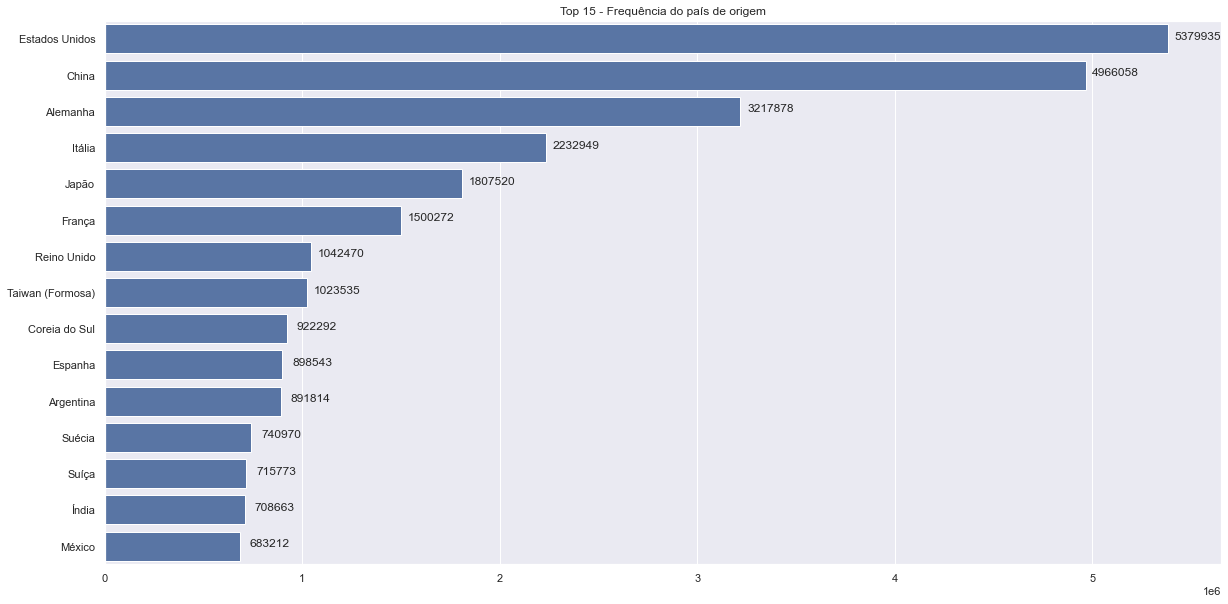

In [16]:
sns.set_theme(style="darkgrid")

# Contagem valores
count = df.NO_PAIS.value_counts()

# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(20, 10))
bar = sns.barplot(x=list(count)[:15], y=list(count.index)[:15],
            label="Total", color="b")

for p in bar.patches:
    bar.annotate(int(p.get_width()), 
                   (p.get_width() + p.get_x(), p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (30, -12), 
                   textcoords = 'offset points')
    

ax.set_title("Top 15 - Frequência do país de origem")
plt.show()

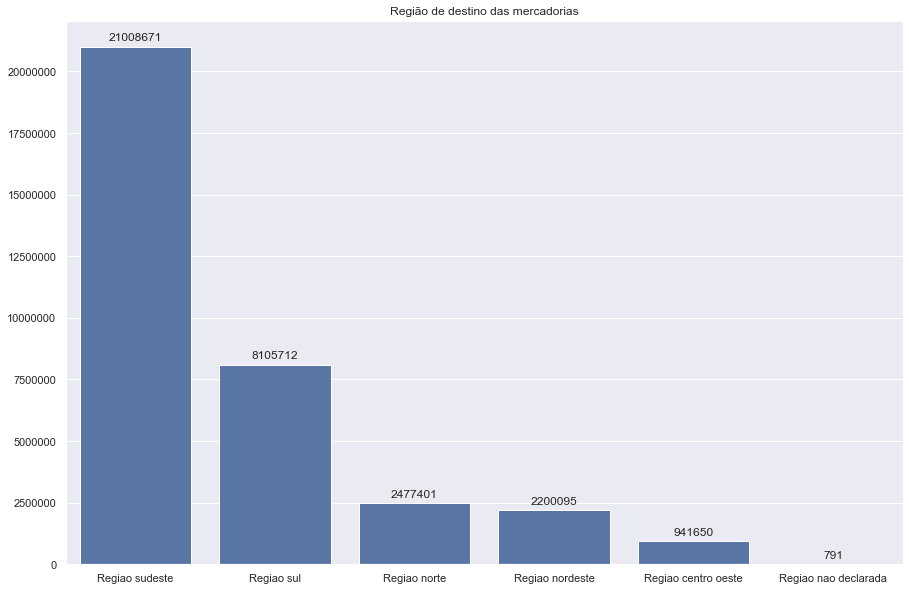

In [17]:
sns.set_theme(style="darkgrid")

# Contagem valores
count = df.NO_REGIAO.value_counts()

# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(count), x=[x.lower().capitalize() for x in count.index],
            label="Total", color="b")

for p in bar.patches:
    bar.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
plt.show()

## Vias de transporte
---

Abaixo mostra o gráfico da quantidade de vezes que as vias de transporte foram usadas e sua porcentagem em relação ao todo. As vias mais utilizadas são a **Aerea**, **Marítima** e **Rodoviária**. As vias de transporte dentro do dataset são:

1. Aerea
2. Maritima
3. Rodoviaria
4. Entrada/saida ficta
5. Postal
6. Meios proprios
7. Ferroviaria
8. Conduto/rede de transmissao
9. Fluvial
10. Courier
11. Lacustre

Para melhor visualização, as demais vias serão incluídas na categoria "Outros" sendo assim **Aerea**, **Marítima**, **Rodoviária** e **Outras** as novas categorias de vias.

In [18]:
# Contagem dos valores
count = df.NO_VIA.value_counts()

total = count.sum()

Visão geral da quantidade

In [19]:
# Ajustes do dataframe

vias = pd.DataFrame(count)
vias.rename({'NO_VIA':'quantidade'},axis=1,inplace=True)

vias['porcentagem'] = vias.quantidade.apply(lambda x: x/total)

vias

,quantidade,porcentagem
AEREA,17512862,0.504195
MARITIMA,15977988,0.460006
RODOVIARIA,1054762,0.030367
ENTRADA/SAIDA FICTA,118928,0.003424
POSTAL,42610,0.001227
MEIOS PROPRIOS,18168,0.000523
FERROVIARIA,7742,0.000223
CONDUTO/REDE DE TRANSMISSAO,492,0.000014
FLUVIAL,453,0.000013
COURIER,273,0.000008


Visão após a mudança

In [20]:
# Mudanca dos nomes

outros_qtd = vias.iloc[3:,:].quantidade.sum()
vias = vias.iloc[:3]
df_outros = pd.DataFrame({'quantidade' : outros_qtd,'porcentagem':outros_qtd/total},index=['Outros'])
vias = pd.concat([vias,df_outros])

vias

,quantidade,porcentagem
AEREA,17512862,0.504195
MARITIMA,15977988,0.460006
RODOVIARIA,1054762,0.030367
Outros,188708,0.005433


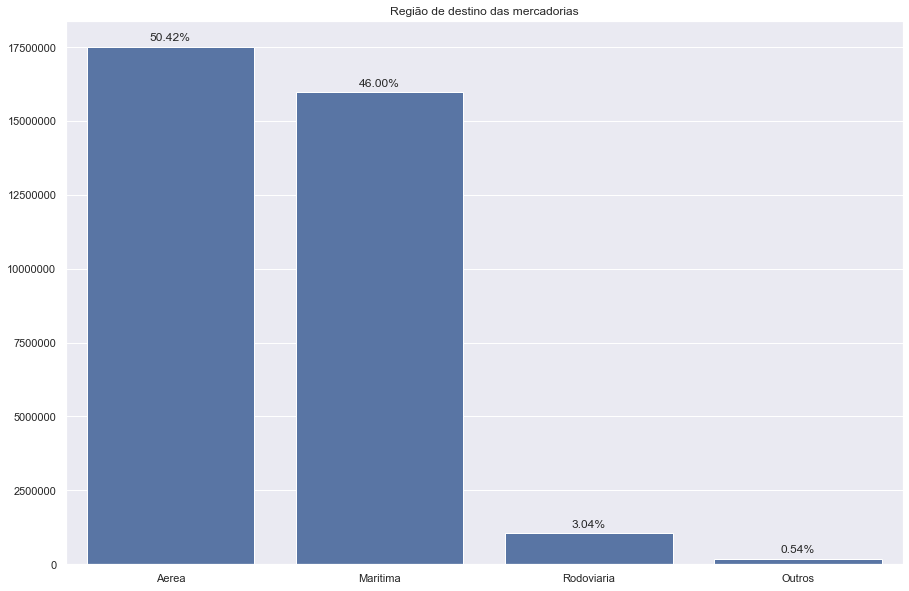

In [21]:
# Escolhendo o tema
sns.set_theme(style="darkgrid")


# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(vias.quantidade), x=[x.lower().capitalize() for x  in vias.index],
            label="Total", color="b")

for i,p in enumerate(bar.patches):
    bar.annotate('{:.2f}%'.format((vias.porcentagem[i])*100), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
#plt.xticks(rotation=45)
plt.show()

Mudança no dataset principal

In [22]:
df.NO_VIA = df.NO_VIA.apply(lambda x : 'OUTROS' if x not in ['AEREA','MARITIMA','RODOVIARIA'] else x)

## Produtos
---

Nesse gráfico é mostrado os 10 produtos mais importados desde de 1997 até 2022 e os meios em que os produtos foram importados.

Para uma melhor análise, foi usado a função logarítmica para melhor observação das proporções.

A maioria dos produtos são peças ou equipamentos de empresas/industrias. Os 10 produtos importados em ordem descrecente:

1. Aparelhos elétricos para ligação, proteção ou conexão de circuitos
2. Máquinas e aparelhos elétricos
3. Adubos ou fertilizantes químicos (exceto fertilizantes brutos)
4. Válvulas e tubos termiônicas, de cátodo frio ou foto-cátodo, diodos, transistores
5. Gás natural, liquefeito ou não
6. Trigo e centeio, não moídos
7. Máquinas de energia elétrica (exceto planta elétrica rotativa do grupo 716) e suas partes
8. Produtos residuais de petróleo e materiais relacionados
9. Elementos químicos inorgânicos, óxidos e sais de halogêneos
10. Carvão, mesmo em pó, mas não aglomerado


In [23]:
aa = df.groupby(['NO_CUCI_GRUPO']).sum().sort_values(by=['QT_ESTAT'],ascending=False)
aa = aa.iloc[:10,:][['QT_ESTAT']]
aa.reset_index(inplace=True)

total = aa.copy()

In [24]:
aa = df.groupby(['NO_CUCI_GRUPO','NO_VIA']).sum().sort_values(by=['QT_ESTAT'],ascending=False)

aa.reset_index(inplace=True)

In [25]:
final = aa.merge(total,on=['NO_CUCI_GRUPO'],how='left')

final = final.rename({'QT_ESTAT_x':'QT_VIA','QT_ESTAT_y':'TOTAL'},axis=1).sort_values(by=['TOTAL'],ascending=False)

final = final[final.NO_CUCI_GRUPO.apply(lambda x: True if x in list(total.NO_CUCI_GRUPO) else False)]
final = final[['NO_CUCI_GRUPO','NO_VIA','QT_VIA','TOTAL']]
final.reset_index(inplace=True)

In [26]:
produtos = list(final.NO_CUCI_GRUPO.value_counts().index)
produtos.sort()

In [27]:
df_final = []

for prod in produtos:
    aux = final[final.NO_CUCI_GRUPO == prod][['NO_VIA','QT_VIA']]
    df_final.append(pd.DataFrame([list(aux['QT_VIA'])],columns=list(aux['NO_VIA']),index=[prod]))

df_final = pd.concat(df_final)

df_final.fillna(0,inplace=True)

C:\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


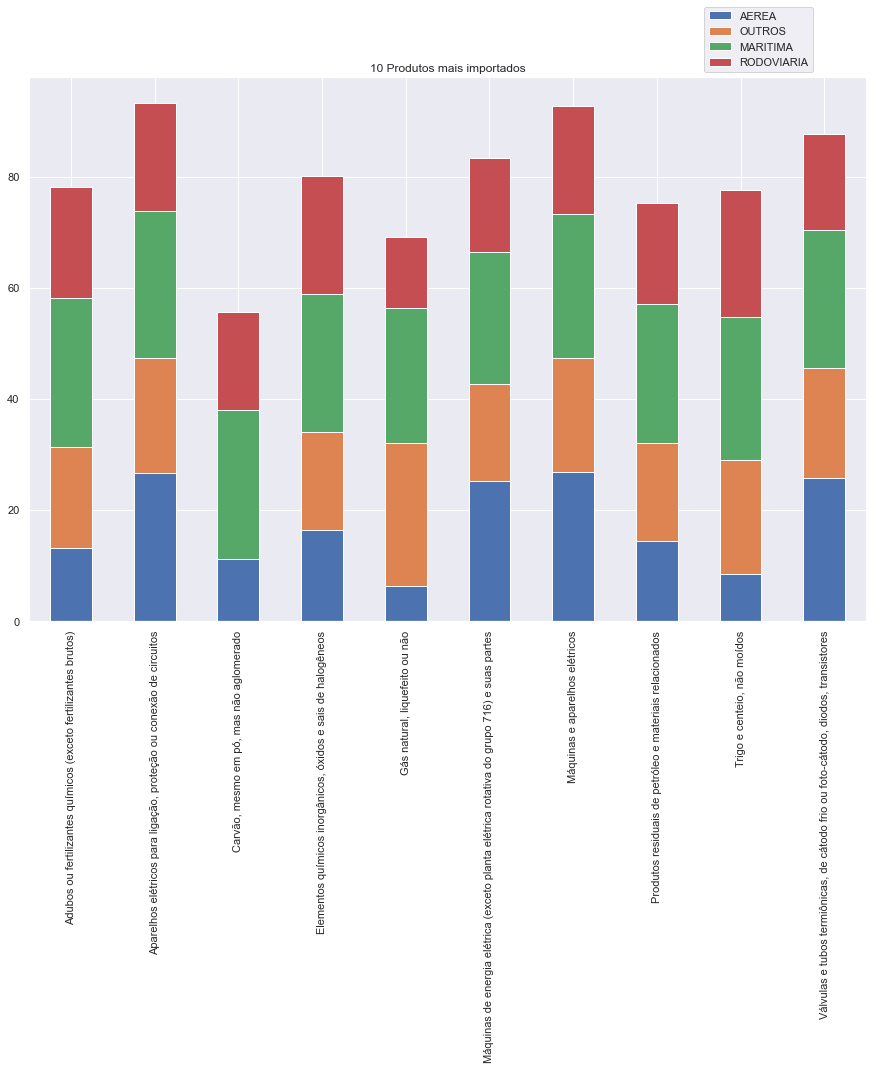

In [28]:
barplot = np.log(df_final).plot(kind="bar",stacked=True,figsize=(15,10))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('10 Produtos mais importados')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Produto')
plt.show()

## Correlações
---
Para identificar os atributos que possuem correlação com o valor do frete.

O frete possui relação com os atributos **Quantidade estatística**, **FOB** e **Kilograma Líquido**.

In [29]:
corr = df_bruto.corr()

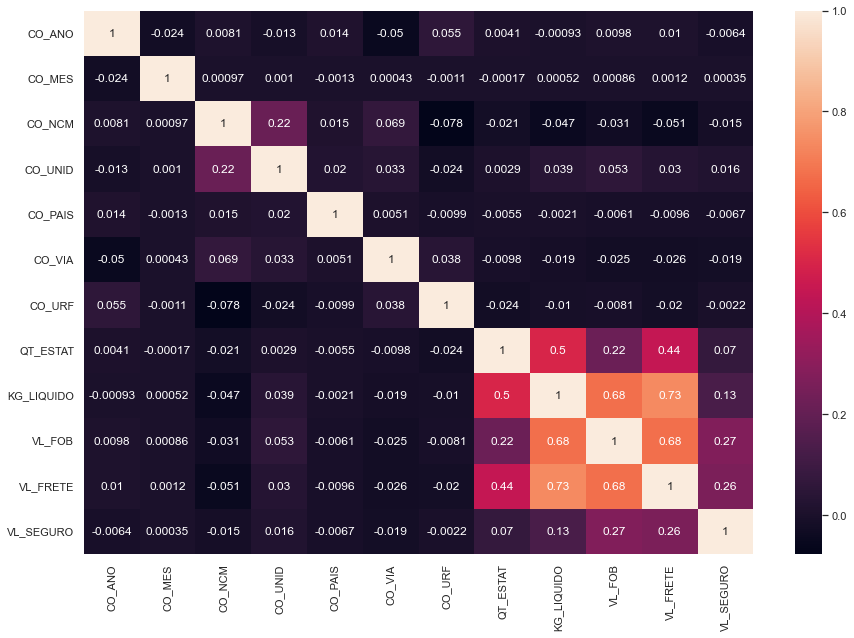

In [30]:
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(15, 10))

    ax = sns.heatmap(corr,annot=True)

**Função para plot de correlações**

In [31]:
def plot_corr(df,col,xcor):
    anos = list(df.CO_ANO.value_counts().index)
    anos.sort()
    
    row = (len(anos)// col) + 1

    fig, axs = plt.subplots(row, col,figsize=(20, 15))

    posi = 0
    for i in tqdm(range(row)):
        for j in range(col):
            if(len(anos) == posi):
                axs[i, j].set_axis_off()
            else:
                aux = df[df.CO_ANO == anos[posi]]
                axs[i, j].scatter(x=aux[xcor],y=aux.VL_FRETE)
                axs[i, j].set_title(str(anos[posi]))
                posi += 1

    plt.tight_layout()
    plt.show()

## Frete - Quilograma
---

  0%|          | 0/6 [00:00<?, ?it/s]

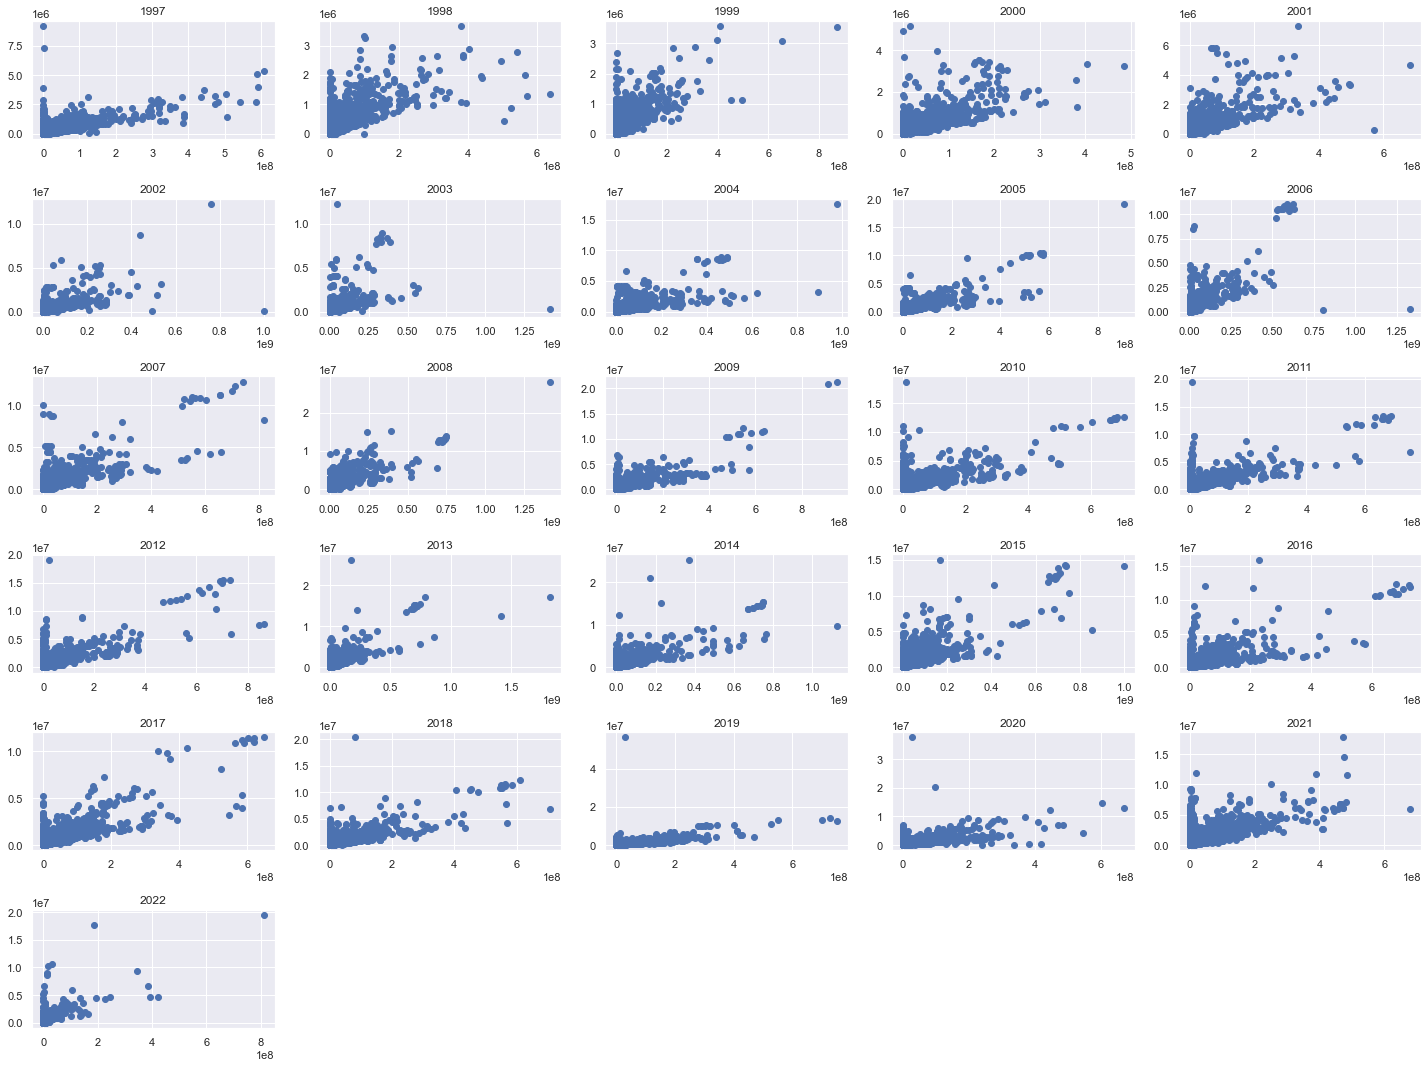

In [32]:
plot_corr(df,5,'KG_LIQUIDO')

## Frete - Quantidade
---

  0%|          | 0/6 [00:00<?, ?it/s]

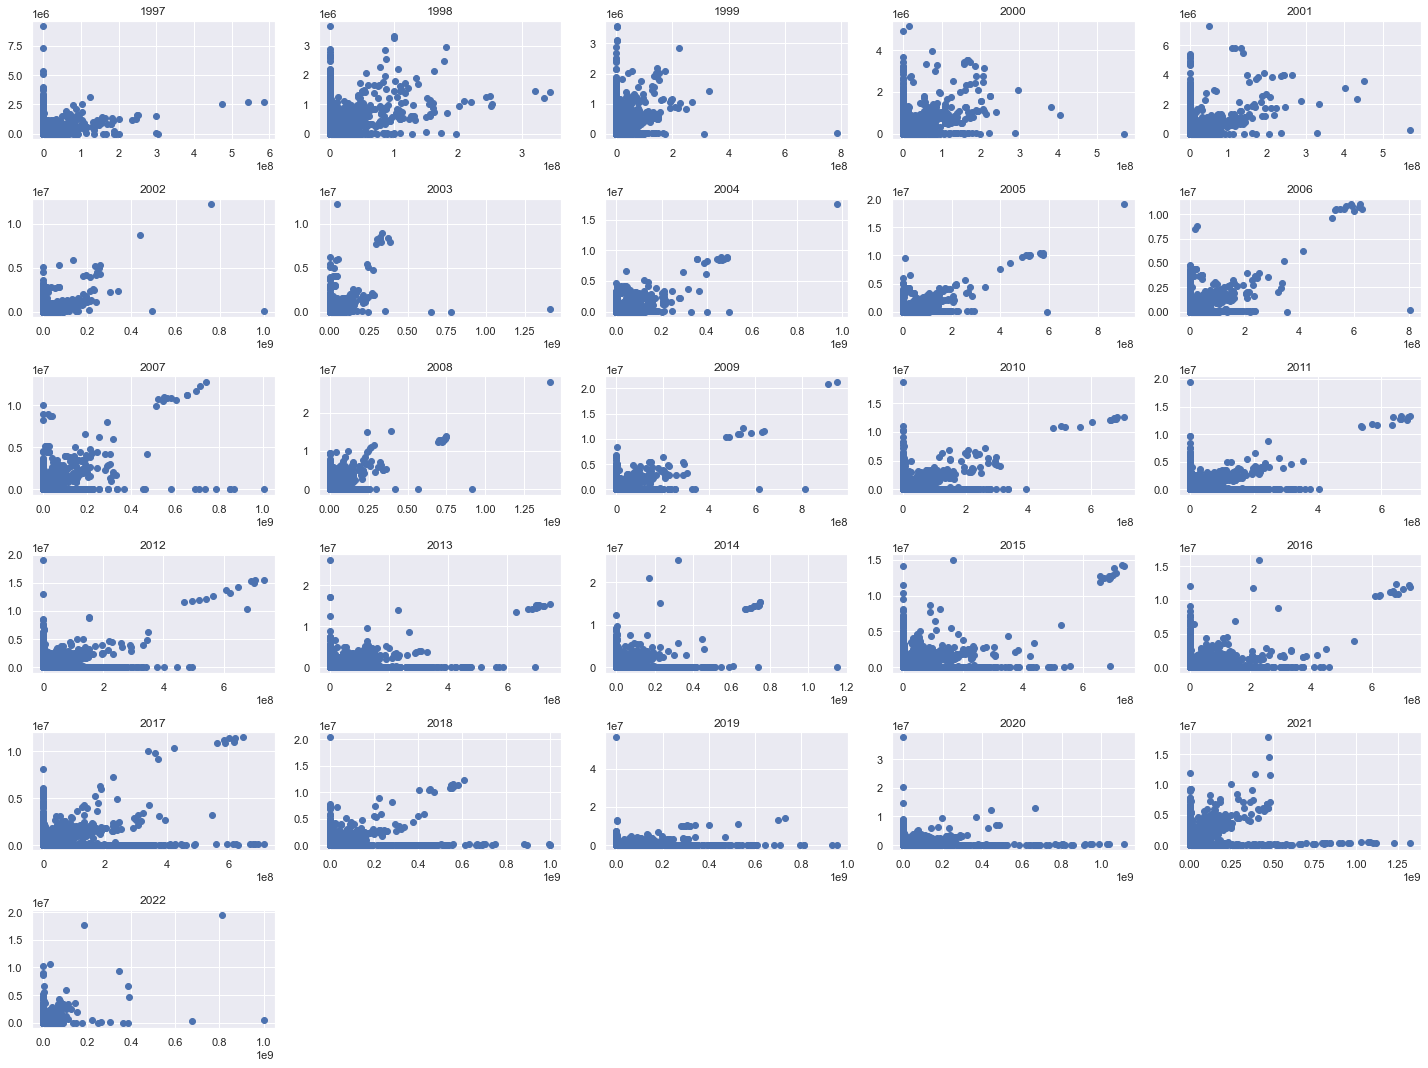

In [33]:
plot_corr(df,5,'QT_ESTAT')

## Frete - FOB
---

  0%|          | 0/6 [00:00<?, ?it/s]

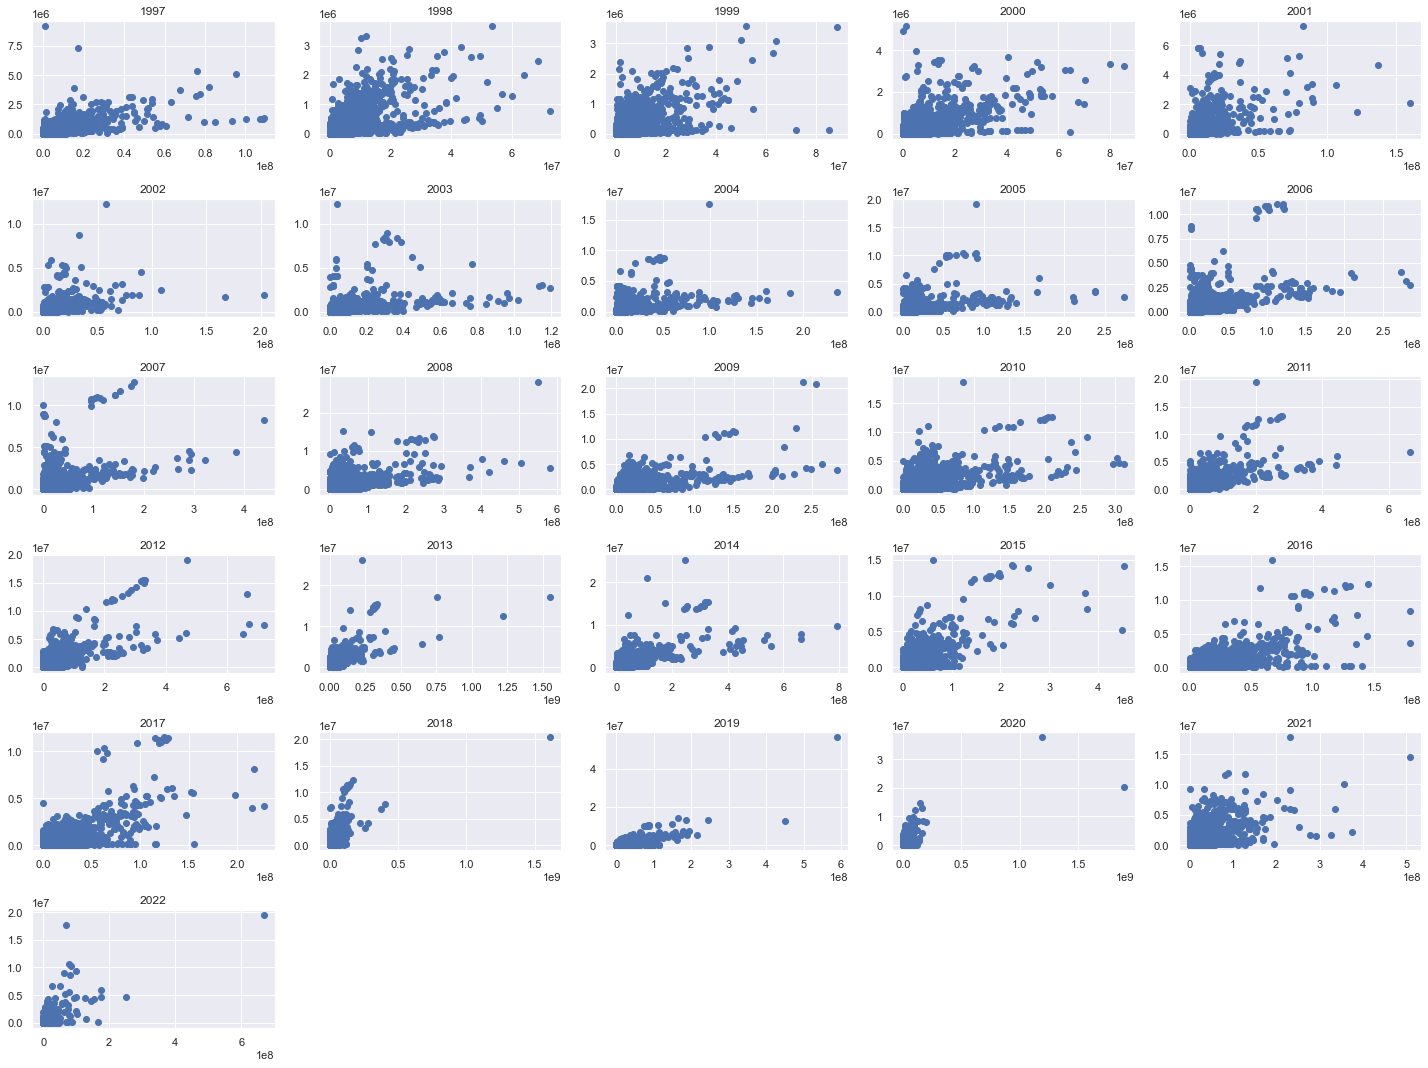

In [34]:
plot_corr(df,5,'VL_FOB')